# Capstone Project Introduction and Data

## 1. Introduction

### 1.a. Business Problem

I am a keen outdoor enthusiast as are many others, and one of my favourite hobbies is hiking. Whenever I am on holiday I will try to find local hikes which combine the right level of challenge, natural beauty, and solitude, but doing so based on random internet searches or individual recommendations often makes me wonder if I have made the most of the area I am visiting, or indeed whether I have visited the best area to pursue my hobby.

The problem this project will address is the challenge of selecting an appropriate location for a hiking holiday (and by *appropriate* I am talking about locations that have access to the right number of hikes, that are of the right quality and difficulty, and which are not too crowded).

### 1.b. Target Audience

The target audience for this project's output would be a business that owned a website which aimed to help like-minded people identify their preferred hiking destination, and perhaps to identify a location that met their needs that was less well known.

The target audience could potentially also include:
+ Individuals using said website.
+ Local tourism agencies wishing to promote tourism in their area.
+ Healthcare providers wishing to encourage more active lifestyles.

![alt text](https://www.backpacker.com/.image/c_limit%2Ccs_srgb%2Cq_auto:good%2Cw_860/MTQ5NTkxODMyNDA4MzY4NjA0/35541767156_8ba52234a0_o.webp "Logo Title Text 1")

## 2. Data

### 2.a. Data Overview

There are three main data sources I will use for this project:
+ **Hiking Project:** This is a website that offers a free-to-use API that will allow me to retrieve data relating to different hiking routes. I have given an example below that includes the type of data available. The web address is: https://www.hikingproject.com/data
+ **US National Park Service (NPS) Data Store:** I have chosen to use US National Parks and other areas managed by the US National Park Service as the potential locations for analysis as part of this project. Data relating to the visitor numbers for each location is available within the following downloadable document*: https://irma.nps.gov/DataStore/DownloadFile/620857#page=21&zoom=100,0,336
+ **Geocoder location data:** In order to identify proximity between NPS locations and hiking trails I will use the *geopy* geocoder as was done in other course labs.

\* *This download is a pdf document from which tabular data can be extracted using the **tabula** library*

Full details of the data extraction approach can be found in the *Methodology* section, but the following example gives a brief explanation of how the Hiking Project data can be sourced using their API:

### 2.b. Data retrieval example (hikingproject.com)

The following code sections demonstrate how data relating to hiking trails can be retrieved from Hiking Project. The API is able to retrieve data including:
+ The location of specific hiking trails - which will allow us to determine how many are close to other locations.
+ The rating of those hiking trails by users - which will give an indication of the quality of the trails (e.g. natural beauty).
+ The length, ascent, descent, height, and difficulty rating of those hiking trails - which would also be distinguishing features.

**1. First import libraries:**

In [1]:
import requests
import pandas as pd

**2. Define API parameters and create url for API request:**

In [2]:
lat = 40.0274 # Random US location to test
long = -105.2519 # Random US location to test
maxDistance = 15 # Max distance from defined locations
maxResults = 500 # Max number of results is 500 from this API
key = '200581789-f40ea73ef2b0bac87cf5c431217fc969' # My Hiking Project API key

# create the API request URL
url = 'https://www.hikingproject.com/data/get-trails?lat={}&lon={}&maxDistance={}&maxResults={}&key={}'.format(
    lat, 
    long,
    maxDistance,
    maxResults,
    key)

**3. Make API call:**

In [3]:
results = requests.get(url).json()["trails"]

**4. Check results:**

In [4]:
results

[{'id': 7000130,
  'name': 'Bear Peak Out and Back',
  'type': 'Featured Hike',
  'summary': 'A must-do hike for Boulder locals and visitors alike!',
  'difficulty': 'blueBlack',
  'stars': 4.6,
  'starVotes': 108,
  'location': 'Boulder, Colorado',
  'url': 'https://www.hikingproject.com/trail/7000130/bear-peak-out-and-back',
  'imgSqSmall': 'https://cdn-files.apstatic.com/hike/7005382_sqsmall_1554312030.jpg',
  'imgSmall': 'https://cdn-files.apstatic.com/hike/7005382_small_1554312030.jpg',
  'imgSmallMed': 'https://cdn-files.apstatic.com/hike/7005382_smallMed_1554312030.jpg',
  'imgMedium': 'https://cdn-files.apstatic.com/hike/7005382_medium_1554312030.jpg',
  'length': 5.7,
  'ascent': 2541,
  'descent': -2540,
  'high': 8342,
  'low': 6103,
  'longitude': -105.2755,
  'latitude': 39.9787,
  'conditionStatus': 'All Clear',
  'conditionDetails': '',
  'conditionDate': '2019-08-10 16:37:58'},
 {'id': 7004226,
  'name': "Sunshine Lion's Lair Loop",
  'type': 'Featured Hike',
  'summary

**5. Loop through results to load a pandas dataframe, and check this has completed successfully:**

In [5]:
df = pd.DataFrame(columns=['name', 'type', 'difficulty', 'stars', 'starVotes', 
                           'location', 'length', 'ascent', 'descent', 
                           'high', 'low', 'latitude', 'longitude'])

for v in results:
    # initialize list of lists 
    data = [v['name'], 
            v['type'], 
            v['difficulty'],
            v['stars'],
            v['starVotes'],
            v['location'],
            v['length'], 
            v['ascent'], 
            v['descent'], 
            v['high'],
            v['low'],
            v['latitude'],
            v['longitude']] 
    # Create the pandas DataFrame 
    df_temp = pd.DataFrame([data], columns=['name', 'type', 'difficulty', 'stars', 'starVotes', 'location', 'length', 'ascent', 'descent', 'high', 'low', 'latitude', 'longitude']) 
    # append temp dataframe to main dataframe 
    df = df.append(df_temp).reset_index(drop=True)
    
df.head()

,name,type,difficulty,stars,starVotes,location,length,ascent,descent,high,low,latitude,longitude
0,Bear Peak Out and Back,Featured Hike,blueBlack,4.6,108,"Boulder, Colorado",5.7,2541,-2540,8342,6103,39.9787,-105.2755
1,Sunshine Lion's Lair Loop,Featured Hike,blue,4.5,103,"Boulder, Colorado",5.3,1261,-1282,6800,5530,40.0200,-105.2979
2,Boulder Skyline Traverse,Featured Hike,black,4.7,71,"Superior, Colorado",16.3,5409,-5492,8492,5417,39.9388,-105.2582
3,Royal Arch Out and Back,Featured Hike,blueBlack,4.4,145,"Boulder, Colorado",3.3,1311,-1312,6917,5691,39.9997,-105.2830
4,Walker Ranch,Featured Hike,blueBlack,4.5,118,"Coal Creek, Colorado",7.6,1594,-1585,7335,6439,39.9511,-105.3378


## 3. Methodology

### 3.a. Methodology overview

In order to support the target audience with the business problem at hand, this project aims to segment the National Park Service locations such that they are assigned to groups which reflect the following:

+ The total quantity of trails nearby.
+ The average quality of those trails (using average user ratings).
+ The average difficulty of those trails.
+ The popularity of the location.

The clusters should reflect groups of locations that the target audience would consider useful - for example, it is anticipated that a cluster will exist containing locations with **many** trails which have high ratings for **difficulty** and **quality** and with **low levels of visitation**.

In order to achieve this we will use k-means clustering on a consolidated dataset that brings together the required information for as many locations as possible. The value for *k* will be adjusted and the output clusters reviewed to determine a meaningful and helpful segmentation. We will then visualise the clusters on a map.

### 3.b. Data extraction: NPS Locations and Visitation Figures

The first dataset we will require is the set of US National Park Service locations and their visitor numbers (from the table starting on page 11 of the  file https://irma.nps.gov/DataStore/DownloadFile/620857#page=21&zoom=100,0,336). The two columns we are most interested in from this dataset are *Park Name* and *Recreation Visitor Days* (a 12 hour visit from one visitor equals a visitor day, and using this data rather than visitors alone could be a better reflection of how busy the location is likely to be).

To extract this data we need the *tabula* library which includes a *read_pdf* function that will automatically pull data from tables in the defined pdf file:

**1. Load libary:**

In [6]:
from tabula import read_pdf

**2. Read the pdf table data to a list:**

In [7]:
df_parks = read_pdf('2018 NPS Statistical Abstract.pdf',multiple_tables=True,pages='all')

**3. Check the list contains the type of data we need - column 6 appears to have combined two columns from the pdf table so we will need to deal with this later:**

In [8]:
df_parks[9].head()

,0,1,2,3,4,5,6,7
0,NaN,NaN,Visits,NaN,NaN,NaN,Days,NaN
1,NaN,NaN,Percent,NaN,Percent,NaN,Percent,Percent
2,Park Name,Recreation,Change,Non-Rec,Change,Recreation,Change Non-Rec,Change
3,Assateague Island NS3,"2,136,889",-9.0%,"3,600",0.0%,"1,510,889",-9.2% 300,0.0%
4,Aztec Ruins NM,"54,933",4.1%,"1,893",3.2%,"6,867",4.1% 158,3.2%


**4. In this case the pdf table stretches over several pages, and each has been split by the read_pdf function, so we need to loop through the corresponding 'tables' in the pdf (tables 9 to 24 in this case) and append to a single dataframe, *df_parks_extracted*, as follows:**

In [9]:
# Start with a blank dataframe with numeric column names - loop through the relevant tables in the data extracted from 
# the Park Visitor data pdf file and append to this blank dataframe. Tables 9 to 24 as extracted from the pdf are needed.
df_parks_extracted = pd.DataFrame(columns=[])
for i in range(9,25):
    df_parks_extracted = df_parks_extracted.append(df_parks[i], ignore_index=True)#.reset_index(drop=True)
    
df_parks_extracted.head()

,0,1,2,3,4,5,6,7
0,NaN,NaN,Visits,NaN,NaN,NaN,Days,NaN
1,NaN,NaN,Percent,NaN,Percent,NaN,Percent,Percent
2,Park Name,Recreation,Change,Non-Rec,Change,Recreation,Change Non-Rec,Change
3,Assateague Island NS3,"2,136,889",-9.0%,"3,600",0.0%,"1,510,889",-9.2% 300,0.0%
4,Aztec Ruins NM,"54,933",4.1%,"1,893",3.2%,"6,867",4.1% 158,3.2%


**5. Tidy this up a little bit by removing rows that contain table headers, the total row, and NaN rows that have appeared due to the pdf formatting:**

In [10]:
# Filter out any 'header row' which will have 'Park Name' in column 0, the grand total row, and any rows with NaN for column 0.
df_parks_extracted_parksonly = df_parks_extracted[(df_parks_extracted[0]!='Park Name') 
                   & (df_parks_extracted[0]!='NPS Total') 
                   & (df_parks_extracted[0].notnull())]

# Reset the dataframe index for neatness
df_parks_extracted_parksonly.reset_index(drop=True, inplace=True)

df_parks_extracted_parksonly.head()

,0,1,2,3,4,5,6,7
0,Assateague Island NS3,"2,136,889",-9.0%,"3,600",0.0%,"1,510,889",-9.2% 300,0.0%
1,Aztec Ruins NM,"54,933",4.1%,"1,893",3.2%,"6,867",4.1% 158,3.2%
2,"Badlands NP3,5","1,008,942",-4.3%,"105,109",55.8%,"357,735","-12.5% 4,380",55.8%
3,Bandelier NM5,"198,441",-5.1%,840,0.0%,"80,323",2.5% 18,80.0%
4,Belmont-Paul Women's Equality NM,"9,081",-16.6%,0,-100.0%,754,-13.4% 0,-100.0%


**6. And now update the column names for clarity:**

In [11]:
# Define list of column names to apply to dataframe - pdf extract will have numbered columns only
column_list = ['Park Name',
               'Visits (Recreation)',
               'Visits (Recreation) Percentage Change',
               'Visits (Non-Recreation)',
               'Visits (Non-Recreation) Percentage Change',
               'Visitor Days (Recreation)',
               'TO BE SPLIT',
               'Visitor Days (Non-Recreation) Percentage Change']

# Update column names
df_parks_extracted_parksonly.columns = column_list
df_parks_extracted_parksonly.head()

,Park Name,Visits (Recreation),Visits (Recreation) Percentage Change,Visits (Non-Recreation),Visits (Non-Recreation) Percentage Change,Visitor Days (Recreation),TO BE SPLIT,Visitor Days (Non-Recreation) Percentage Change
0,Assateague Island NS3,"2,136,889",-9.0%,"3,600",0.0%,"1,510,889",-9.2% 300,0.0%
1,Aztec Ruins NM,"54,933",4.1%,"1,893",3.2%,"6,867",4.1% 158,3.2%
2,"Badlands NP3,5","1,008,942",-4.3%,"105,109",55.8%,"357,735","-12.5% 4,380",55.8%
3,Bandelier NM5,"198,441",-5.1%,840,0.0%,"80,323",2.5% 18,80.0%
4,Belmont-Paul Women's Equality NM,"9,081",-16.6%,0,-100.0%,754,-13.4% 0,-100.0%


**7. Let's deal with that combined column - first split it into a fresh dataframe, *expand_cols*:**

In [12]:
expand_cols = pd.DataFrame(columns=[]) # Start with a blank dataframe
expand_cols = df_parks_extracted_parksonly['TO BE SPLIT'].str.split("%", n = 1, expand = True) # Use the str.split command to split into two columns
expand_cols[0]=expand_cols[0]+'%' # Reinstate the % symbol
expand_cols.columns=['Visitor Days (Recreation) Percentage Change', 'Visitor Days (Non-Recreation)'] # Relabel the columns
expand_cols.head() # Review

,Visitor Days (Recreation) Percentage Change,Visitor Days (Non-Recreation)
0,-9.2%,300
1,4.1%,158
2,-12.5%,"4,380"
3,2.5%,18
4,-13.4%,0


**8. Then combine this new dataframe with *df_parks_extracted_parksonly*, reordering/dropping columns as necessary:**

In [13]:
df_parks_extracted_parksonly2 = pd.concat([df_parks_extracted_parksonly, expand_cols], axis=1)
df_parks_extracted_parksonly2.drop(columns=['TO BE SPLIT'])

cols = df_parks_extracted_parksonly2.columns.tolist()
cols = cols[0:6] + cols[-2:] + [cols[-3]]
df_parks_extracted_parksonly_clean = df_parks_extracted_parksonly2[cols].copy()

df_parks_extracted_parksonly_clean.head()

,Park Name,Visits (Recreation),Visits (Recreation) Percentage Change,Visits (Non-Recreation),Visits (Non-Recreation) Percentage Change,Visitor Days (Recreation),Visitor Days (Recreation) Percentage Change,Visitor Days (Non-Recreation),Visitor Days (Non-Recreation) Percentage Change
0,Assateague Island NS3,"2,136,889",-9.0%,"3,600",0.0%,"1,510,889",-9.2%,300,0.0%
1,Aztec Ruins NM,"54,933",4.1%,"1,893",3.2%,"6,867",4.1%,158,3.2%
2,"Badlands NP3,5","1,008,942",-4.3%,"105,109",55.8%,"357,735",-12.5%,"4,380",55.8%
3,Bandelier NM5,"198,441",-5.1%,840,0.0%,"80,323",2.5%,18,80.0%
4,Belmont-Paul Women's Equality NM,"9,081",-16.6%,0,-100.0%,754,-13.4%,0,-100.0%


**9. Note there are some random numbers in the Park Names, separated by commas if there are more than one. These are the footnote references from the pdf file and can be removed as so:**

In [14]:
df_parks_extracted_parksonly_clean.loc[:, 'Park Name'] = df_parks_extracted_parksonly_clean.loc[:, 'Park Name'].str.replace('\d+', '')
df_parks_extracted_parksonly_clean.loc[:, 'Park Name'] = df_parks_extracted_parksonly_clean.loc[:, 'Park Name'].str.replace(',', '')
df_parks_extracted_parksonly_clean.head()

,Park Name,Visits (Recreation),Visits (Recreation) Percentage Change,Visits (Non-Recreation),Visits (Non-Recreation) Percentage Change,Visitor Days (Recreation),Visitor Days (Recreation) Percentage Change,Visitor Days (Non-Recreation),Visitor Days (Non-Recreation) Percentage Change
0,Assateague Island NS,"2,136,889",-9.0%,"3,600",0.0%,"1,510,889",-9.2%,300,0.0%
1,Aztec Ruins NM,"54,933",4.1%,"1,893",3.2%,"6,867",4.1%,158,3.2%
2,Badlands NP,"1,008,942",-4.3%,"105,109",55.8%,"357,735",-12.5%,"4,380",55.8%
3,Bandelier NM,"198,441",-5.1%,840,0.0%,"80,323",2.5%,18,80.0%
4,Belmont-Paul Women's Equality NM,"9,081",-16.6%,0,-100.0%,754,-13.4%,0,-100.0%


**10. Ultimately we are going to try and find latitudes and longitudes for each location using a geocoder - but from some experimentation it is apparent that the geocoder does a lot better if the *Park Names* column includes the full name instead of abbreviations - e.g. 'National Park' instead of 'NP'. So let's replace these common abbreviations (if they are the last word in the string in the *Park Name* column:**

In [15]:
# Here we are using the lambda function to replace all different types of abbreviation if they are the last word of a Park Name: 
df_parks_extracted_parksonly_clean['Park Name (Ext)'] = df_parks_extracted_parksonly_clean['Park Name'].apply(lambda x: (' '.join(x.split()[:-2]) + " Campground" if x.split()[-1]=='CG' else
                                                                 ' '.join(x.split()[:-1]) + " Ecological Preserve" if x.split()[-2:]==['ECOL', 'PRES'] else 
                                                                 ' '.join(x.split()[:-1]) + " Ecological & Historic Preserve" if x.split()[-1]=='EHP' else 
                                                                 ' '.join(x.split()[:-1]) + " Historic Site" if x.split()[-1]=='HS' else 
                                                                 ' '.join(x.split()[:-1]) + " International Historic Site" if x.split()[-1]=='IHS' else 
                                                                 ' '.join(x.split()[:-1]) + " Memorial" if x.split()[-1]=='MEM' else 
                                                                 ' '.join(x.split()[:-1]) + " National Battlefield" if x.split()[-1]=='NB' else 
                                                                 ' '.join(x.split()[:-1]) + " National Battlefield Park" if x.split()[-1]=='NBP' else 
                                                                 ' '.join(x.split()[:-1]) + " National Battlefield Site" if x.split()[-1]=='NBS' else 
                                                                 ' '.join(x.split()[:-1]) + " National Heritage Corridor" if x.split()[-1]=='NHC' else 
                                                                 ' '.join(x.split()[:-1]) + " National Historical Park" if x.split()[-1]=='NHP' else 
                                                                 ' '.join(x.split()[:-1]) + " National Historical Reserve" if x.split()[-1]=='NHR' else 
                                                                 ' '.join(x.split()[:-1]) + " National Historic Site" if x.split()[-1]=='NHS' else 
                                                                 ' '.join(x.split()[:-1]) + " National Lakeshore" if x.split()[-1]=='NL' else 
                                                                 ' '.join(x.split()[:-1]) + " National Monument" if x.split()[-1]=='NM' else 
                                                                 ' '.join(x.split()[:-1]) + " National Memorial" if x.split()[-1]=='NMEM' else 
                                                                 ' '.join(x.split()[:-1]) + " National Military Park" if x.split()[-1]=='NMP' else 
                                                                 ' '.join(x.split()[:-1]) + " Non-Recreation" if x.split()[-1]=='NON-REC' else 
                                                                 ' '.join(x.split()[:-1]) + " National Park" if x.split()[-1]=='NP' else
                                                                 ' '.join(x.split()[:-1]) + " National Preserve" if x.split()[-1]=='NPRES' else
                                                                 ' '.join(x.split()[:-1]) + " National River" if x.split()[-1]=='NR' else
                                                                 ' '.join(x.split()[:-1]) + " National River & Recreation Area" if x.split()[-1]=='NRRA' else
                                                                 ' '.join(x.split()[:-1]) + " National Recreation Area" if x.split()[-1]=='NRA' else
                                                                 ' '.join(x.split()[:-1]) + " National Reserve" if x.split()[-1]=='NRES' else
                                                                 ' '.join(x.split()[:-1]) + " National Recreational River" if x.split()[-1]=='NRR' else
                                                                 ' '.join(x.split()[:-1]) + " National Seashore" if x.split()[-1]=='NS' else
                                                                 ' '.join(x.split()[:-1]) + " National Scenic River" if x.split()[-1]=='NSR' else
                                                                 ' '.join(x.split()[:-1]) + " National Scenic Trail" if x.split()[-1]=='NST' else
                                                                 ' '.join(x.split()[:-1]) + " Parkway" if x.split()[-1]=='PKWY' else
                                                                 ' '.join(x.split()[:-1]) + " Preserve" if x.split()[-1]=='PRES' else
                                                                 ' '.join(x.split()[:-1]) + " Recreation Area" if x.split()[-1]=='RA' else
                                                                 ' '.join(x.split()[:-1]) + " Railroad" if x.split()[-1]=='RR' else
                                                                 ' '.join(x.split()[:-1]) + " Scenic & Recreational River" if x.split()[-1]=='S&RR' else
                                                                 ' '.join(x.split()[:-1]) + " Wild & Scenic River" if x.split()[-1]=='W&SR' else x))

df_parks_extracted_parksonly_clean.head()

,Park Name,Visits (Recreation),Visits (Recreation) Percentage Change,Visits (Non-Recreation),Visits (Non-Recreation) Percentage Change,Visitor Days (Recreation),Visitor Days (Recreation) Percentage Change,Visitor Days (Non-Recreation),Visitor Days (Non-Recreation) Percentage Change,Park Name (Ext)
0,Assateague Island NS,"2,136,889",-9.0%,"3,600",0.0%,"1,510,889",-9.2%,300,0.0%,Assateague Island National Seashore
1,Aztec Ruins NM,"54,933",4.1%,"1,893",3.2%,"6,867",4.1%,158,3.2%,Aztec Ruins National Monument
2,Badlands NP,"1,008,942",-4.3%,"105,109",55.8%,"357,735",-12.5%,"4,380",55.8%,Badlands National Park
3,Bandelier NM,"198,441",-5.1%,840,0.0%,"80,323",2.5%,18,80.0%,Bandelier National Monument
4,Belmont-Paul Women's Equality NM,"9,081",-16.6%,0,-100.0%,754,-13.4%,0,-100.0%,Belmont-Paul Women's Equality National Monument


### 3.c. Data extraction: NPS Locations and Visitation Figures

Now we need to know the latitudes and longitudes of the NPS locations so we can test the proximity with individual hiking trails.  This will require the geocoder and since this might not be able to find every location we will test it and see if it finds enough for us to find useful (assuming it finds a good majority we will discard the rest for this project).

We use the following steps: 

**1. Let's use the geocoder to get the latitude and longitudes of each location by looping through all the Park Names with extended abbreviations:** 

In [16]:
from geopy.geocoders import Nominatim # Import Nominatim from the geocoder
import numpy as np # Import numpy

geolocator = Nominatim(user_agent="ny_explorer") # Set the geolocator

# For every Park Name try to find latitude and longitude
for i, address in enumerate(df_parks_extracted_parksonly_clean['Park Name (Ext)'].to_list()):
    try:
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        df_parks_extracted_parksonly_clean.loc[i,'Latitude'] = latitude
        df_parks_extracted_parksonly_clean.loc[i,'Longitude'] = longitude
    except:
        df_parks_extracted_parksonly_clean.loc[i,'Latitude'] = np.nan
        df_parks_extracted_parksonly_clean.loc[i,'Longitude'] = np.nan

df_parks_extracted_parksonly_clean.head() # Review

,Park Name,Visits (Recreation),Visits (Recreation) Percentage Change,Visits (Non-Recreation),Visits (Non-Recreation) Percentage Change,Visitor Days (Recreation),Visitor Days (Recreation) Percentage Change,Visitor Days (Non-Recreation),Visitor Days (Non-Recreation) Percentage Change,Park Name (Ext),Latitude,Longitude
0,Assateague Island NS,"2,136,889",-9.0%,"3,600",0.0%,"1,510,889",-9.2%,300,0.0%,Assateague Island National Seashore,38.089485,-75.214334
1,Aztec Ruins NM,"54,933",4.1%,"1,893",3.2%,"6,867",4.1%,158,3.2%,Aztec Ruins National Monument,36.835587,-108.001650
2,Badlands NP,"1,008,942",-4.3%,"105,109",55.8%,"357,735",-12.5%,"4,380",55.8%,Badlands National Park,43.527106,-102.361663
3,Bandelier NM,"198,441",-5.1%,840,0.0%,"80,323",2.5%,18,80.0%,Bandelier National Monument,35.784473,-106.312879
4,Belmont-Paul Women's Equality NM,"9,081",-16.6%,0,-100.0%,754,-13.4%,0,-100.0%,Belmont-Paul Women's Equality National Monument,38.892224,-77.003759


**2. We can see that 43 co-ordinates could not be found, but the vast majority, 319, were - so let's continue with those 319 only:**

In [17]:
df_parks_extracted_parksonly_clean['Latitude'].isnull().value_counts() # Test how many latitudes were found

False    318
True      44
Name: Latitude, dtype: int64

In [18]:
df_parks_extracted_parksonly_clean = df_parks_extracted_parksonly_clean[df_parks_extracted_parksonly_clean['Latitude'].notnull()] # Remove null latitudes
df_parks_extracted_parksonly_clean.reset_index(drop=True, inplace=True) # Reset index
df_parks_extracted_parksonly_clean.shape # Check new shape of dataframe has 319 rows

(318, 12)

**This gives us our location dataset which we are ready to combine with the data from Hiking Project.**

### 3.d. Data extraction: Hiking Trail Data

The example in section 2b demonstrated how data relating to nearby trails could be extracted for an individual set of longitude/latitude co-ordinates using the Hiking Trail API. We will now need to do this for each of our NPS locations using the latitudes and longitudes we have just found...and then for each NPS location determine the aggregate features that should be used for clustering.

This is done in the following steps:

**1. We will continue to consider 15km as the maximum distance from the NPS location co-ordinates to consider a hiking trail 'nearby'. This allows for a short drive to the trail-head. Firstly we must call the Hiking Project API for each NPS location and collect the corresponding hiking trail data as we did in the example previously.**

In [19]:
# Keep previous parameters:
maxDistance = 15 # Max distance from defined locations
maxResults = 500 # Max number of results is 500 from this API
key = '200581789-f40ea73ef2b0bac87cf5c431217fc969' # My Hiking Project API key

# Create initial dataframe:
df_api = pd.DataFrame(columns=['Park ID', 'Park Name (Ext)', 'Park lat', 'Park long', 'name', 'type', 'difficulty', 'stars', 'starVotes', 
                           'location', 'length', 'ascent', 'descent', 
                           'high', 'low', 'latitude', 'longitude'])

# Loop through NPS locations:
for name, lat, long in zip(enumerate(df_parks_extracted_parksonly_clean['Park Name (Ext)']), enumerate(df_parks_extracted_parksonly_clean['Latitude']), enumerate(df_parks_extracted_parksonly_clean['Longitude'])):
    # create the API request URL
    url = 'https://www.hikingproject.com/data/get-trails?lat={}&lon={}&maxDistance={}&maxResults={}&key={}'.format(lat[1], long[1], maxDistance, maxResults, key)
    print('Collecting results for ' + name[1])
    # Get API results
    results = requests.get(url).json()["trails"]
    for v in results:
        # initialize list of lists 
        data = [name[0],
                name[1],
                lat[1],
                long[1],
                v['name'], 
                v['type'], 
                v['difficulty'],
                v['stars'],
                v['starVotes'],
                v['location'],
                v['length'], 
                v['ascent'], 
                v['descent'], 
                v['high'],
                v['low'],
                v['latitude'],
                v['longitude']] 
        # Create the pandas DataFrame 
        df_temp = pd.DataFrame([data], columns=['Park ID', 'Park Name (Ext)', 'Park lat', 'Park long', 'name', 'type', 'difficulty', 'stars', 'starVotes', 'location', 'length', 'ascent', 'descent', 'high', 'low', 'latitude', 'longitude']) 
        # append temp dataframe to main dataframe 
        df_api = df_api.append(df_temp).reset_index(drop=True)
    
df_api.head()

,Park ID,Park Name (Ext),Park lat,Park long,name,type,difficulty,stars,starVotes,location,length,ascent,descent,high,low,latitude,longitude
0,0,Assateague Island National Seashore,38.089485,-75.214334,Life on the Marsh Trail,Connector,greenBlue,0,0,"Berlin, Maryland",0.3,2,-2,3,0,38.2066,-75.1602
1,0,Assateague Island National Seashore,38.089485,-75.214334,Life on the Marsh Spur Trail,Connector,green,0,0,"Berlin, Maryland",0.1,3,-2,4,1,38.2061,-75.1614
2,1,Aztec Ruins National Monument,36.835587,-108.001650,Berg Park Trails,Trail,greenBlue,5,1,"Farmington, New Mexico",3.3,57,-42,5348,5302,36.7274,-108.1910
3,1,Aztec Ruins National Monument,36.835587,-108.001650,Alien Run,Trail,blue,4.2,5,"Aztec, New Mexico",9.2,637,-608,6562,6123,36.8788,-107.8994
4,1,Aztec Ruins National Monument,36.835587,-108.001650,Anasazi Trail,Trail,blue,4,1,"Flora Vista, New Mexico",2.9,152,-152,5904,5804,36.7990,-108.1559


In [20]:
df = df_api.copy()

**2. Let's check the data types are sensible - we will need the field *stars* to determine hiking trail quality but this should be numeric:**

In [21]:
df.dtypes

Park ID             object
Park Name (Ext)     object
Park lat           float64
Park long          float64
name                object
type                object
difficulty          object
stars               object
starVotes           object
location            object
length             float64
ascent              object
descent             object
high                object
low                 object
latitude           float64
longitude          float64
dtype: object

**3. So let's change *stars* to be a float data type:**

In [22]:
df[['stars']]=df[['stars']].astype('float64')

**4. We can also see that we have categorical difficulty ratings - we must change these to be numeric to use them in a clustering algorithm:**

In [23]:
df['difficulty'].value_counts(dropna=False)

green        9995
greenBlue    4012
blue         3620
blueBlack    1478
black         806
dblack         74
missing        25
Name: difficulty, dtype: int64

In [24]:
# Here we are using the lambda function to replace categorical difficulty ratings with numeric ratings: 
df['difficulty'] = df['difficulty'].apply(lambda x: (1 if x=='green' else 
                                             2 if x=='greenBlue' else
                                             3 if x=='blue' else
                                             4 if x=='blueBlack' else
                                             5 if x=='black' else
                                             5 if x=='dblack' else np.nan))

In [25]:
df['difficulty'].value_counts(dropna=False)

1.0    9995
2.0    4012
3.0    3620
4.0    1478
5.0     880
NaN      25
Name: difficulty, dtype: int64

**5. We also have some trails with *length* of zero - we can safely assume this really means the data is missing for those trails so let's replace the zeros with NaN. We will later exclude data which is missing key fields.**

In [26]:
# Here we are using the lambda function to replace all zero length trails with a null value: 
df['length'] = df['length'].apply(lambda x: (np.nan if x==0 else x))

In [27]:
df['length'].value_counts(dropna=False)

0.1     2793
NaN     2011
0.2     1616
0.3     1335
0.4     1118
0.5      840
0.6      702
0.7      684
0.8      575
0.9      487
1.0      453
1.4      346
1.2      343
1.1      334
1.3      332
1.5      331
1.7      266
1.6      256
1.8      213
1.9      199
2.0      173
2.1      166
2.2      132
2.4      129
2.9      127
3.2      124
3.1      122
2.3      122
2.6      112
2.5      106
        ... 
27.7       1
34.3       1
32.1       1
25.4       1
33.8       1
68.5       1
57.1       1
22.0       1
49.5       1
83.5       1
24.4       1
18.5       1
22.5       1
38.3       1
67.6       1
21.2       1
31.3       1
23.1       1
62.3       1
20.6       1
33.7       1
64.2       1
31.1       1
18.3       1
76.0       1
58.8       1
23.7       1
21.3       1
26.1       1
59.4       1
Name: length, Length: 344, dtype: int64

**6. We will be taking the average mean value for *stars*, *length* and *difficulty* for the trails nearby each NPS location. Some trails are missing this data so let's exclude those by creating a new DataFrame that excludes them*.**

\* A zero value for *stars* may be a valid value, but we know a trail has no votes if the field *starVotes* is zero.

In [28]:
df_filtered = df[(df.starVotes!=0) & (df.length.notnull()==True) & (df.difficulty.notnull()==True)]
df_filtered.head()

,Park ID,Park Name (Ext),Park lat,Park long,name,type,difficulty,stars,starVotes,location,length,ascent,descent,high,low,latitude,longitude
2,1,Aztec Ruins National Monument,36.835587,-108.00165,Berg Park Trails,Trail,2.0,5.0,1,"Farmington, New Mexico",3.3,57,-42,5348,5302,36.7274,-108.1910
3,1,Aztec Ruins National Monument,36.835587,-108.00165,Alien Run,Trail,3.0,4.2,5,"Aztec, New Mexico",9.2,637,-608,6562,6123,36.8788,-107.8994
4,1,Aztec Ruins National Monument,36.835587,-108.00165,Anasazi Trail,Trail,3.0,4.0,1,"Flora Vista, New Mexico",2.9,152,-152,5904,5804,36.7990,-108.1559
5,1,Aztec Ruins National Monument,36.835587,-108.00165,Alien Run Outer Limits,Trail,4.0,3.3,3,"Aztec, New Mexico",6.7,625,-626,6774,6509,36.8773,-107.8393
6,1,Aztec Ruins National Monument,36.835587,-108.00165,Rigor Mortis,Trail,4.0,3.0,1,"Spencerville, New Mexico",3.7,154,-242,6094,5978,36.8542,-108.1221


**7. Now the null value trails are excluded we can create an aggregated table of mean values per NPS location:**

In [29]:
df_means = df_filtered.groupby(['Park ID', 'Park Name (Ext)'], as_index=False)[['stars','length','difficulty']].mean()
df_means.head()

,Park ID,Park Name (Ext),stars,length,difficulty
0,1,Aztec Ruins National Monument,3.666667,4.766667,3.000000
1,3,Bandelier National Monument,3.858696,3.263043,2.521739
2,4,Belmont-Paul Women's Equality National Monument,3.604054,3.972973,1.641892
3,5,Bent's Old Fort National Historic Site,3.000000,1.500000,1.000000
4,7,Big Bend National Park,3.880645,4.925806,2.645161


**8. Aside from a rating for average trail quality and difficulty, and the average trail length, we also want to know how many trails are close to each NPS location. In this case we will aggregate a count of all trails (including those with missing data).**

In [30]:
df_count = df.groupby(['Park ID', 'Park Name (Ext)'], as_index=False)[['name']].count()
df_count.head()

,Park ID,Park Name (Ext),name
0,0,Assateague Island National Seashore,2
1,1,Aztec Ruins National Monument,6
2,3,Bandelier National Monument,55
3,4,Belmont-Paul Women's Equality National Monument,357
4,5,Bent's Old Fort National Historic Site,3


**9. Then we can combine the two aggregated DataFrames:**

In [31]:
df_combined = pd.merge(df_means, df_count, on='Park ID', how='inner')

In [32]:
df_combined = df_combined[['Park ID','Park Name (Ext)_x','name','stars','length','difficulty']]
df_combined.rename(columns={"Park Name (Ext)_x": "Park_Name", "name": "Num_Trails", "stars": "Avg_Stars", "length": "Avg_Length", "difficulty": "Avg_Difficulty"}, inplace=True)
df_combined.head()

,Park ID,Park_Name,Num_Trails,Avg_Stars,Avg_Length,Avg_Difficulty
0,1,Aztec Ruins National Monument,6,3.666667,4.766667,3.000000
1,3,Bandelier National Monument,55,3.858696,3.263043,2.521739
2,4,Belmont-Paul Women's Equality National Monument,357,3.604054,3.972973,1.641892
3,5,Bent's Old Fort National Historic Site,3,3.000000,1.500000,1.000000
4,7,Big Bend National Park,60,3.880645,4.925806,2.645161


**10. Finally we need to bring in the data relating to the popularity of each NPS location:**

In [33]:
# Ensure df_parks_extracted_parksonly_clean has a Park ID column for joining (use the dataframe index)
df_parks_extracted_parksonly_clean['Park ID'] = df_parks_extracted_parksonly_clean.index
# Join to df_combined
df_combined = pd.merge(df_combined, df_parks_extracted_parksonly_clean, on='Park ID', how='left')
df_combined.drop(columns=['Park Name','Park Name (Ext)'],inplace=True) # Drop unused columns
df_combined[['Park ID','Park_Name','Num_Trails','Avg_Stars','Avg_Length','Avg_Difficulty','Visitor Days (Recreation)']].head()

,Park ID,Park_Name,Num_Trails,Avg_Stars,Avg_Length,Avg_Difficulty,Visitor Days (Recreation)
0,1,Aztec Ruins National Monument,6,3.666667,4.766667,3.000000,"6,867"
1,3,Bandelier National Monument,55,3.858696,3.263043,2.521739,"80,323"
2,4,Belmont-Paul Women's Equality National Monument,357,3.604054,3.972973,1.641892,754
3,5,Bent's Old Fort National Historic Site,3,3.000000,1.500000,1.000000,"3,436"
4,7,Big Bend National Park,60,3.880645,4.925806,2.645161,"862,798"


In [34]:
df_combined.shape

(267, 16)

By using an inner join we only include NPS locations that had trails with non-null data. There are 267 NPS locations with sufficient data to include in our clustering analysis. This is a good number to segment for the following reasons:
+ There should be sufficient locations to split into multiple segments.
+ This represents a good proportion of the original NPS dataset - recall there were 319 NPS locations with lat/long co-ordinates, so we have usable hiking trail data for more than 80% of these.
+ It is expected that some NPS locations might not be near hiking trails - e.g. monuments in urban locations, etc. Those that have usable data a more likely to be the locations we'd be interested in anyway.

### 3.e. Feature selection

Up until this point it has been assumed from the business problem at hand that we will use the following features of the data to segment the NPS locations:

+ Number of trails nearby
+ Average trail star rating
+ Average trail length
+ Average trail difficulty rating
+ Number of Recreational Visitor Days (in 2018)

Now it is worth before confirming this that we check the correlation between average trail lenght and average trail difficulty rating. Common sense would suggest these may be strongly related, and if there is a very clear and strong relationship we may only want to include one of these features so as to not double count the impact of that when clustering.

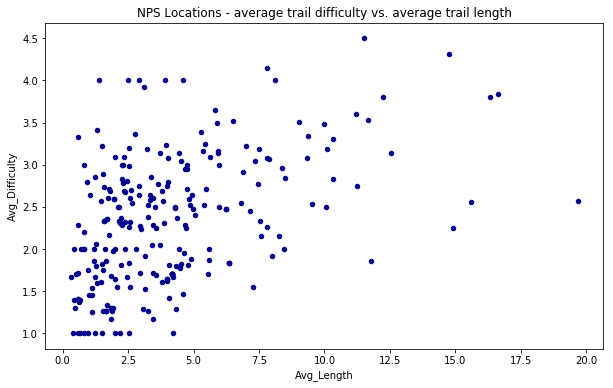

In [35]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

# Only include where average trail length is less than 20km otherwise it is difficult to read the chart
df_combined[df_combined['Avg_Length']<20].plot(kind='scatter', x='Avg_Length', y='Avg_Difficulty', figsize=(10, 6), color='darkblue')

plt.title('NPS Locations - average trail difficulty vs. average trail length')
plt.xlabel('Avg_Length')
plt.ylabel('Avg_Difficulty')

plt.show()

This plot tells us that there might be some correlation, but there are many short hikes which have higher difficulty ratings, so in this case we will include both features to maximise the use of useful information.

It is also worth plotting the distribution of all the features we intend to use - just to get a feel for how they range:

**Plot of Number of Trails Distribution by NPS Location**

In [36]:
bin_size = 30
sequence = [0]
for i in range(1,df_combined['Num_Trails'].max().astype(int)+bin_size):
    if(i%bin_size==0):
        sequence.append(i)

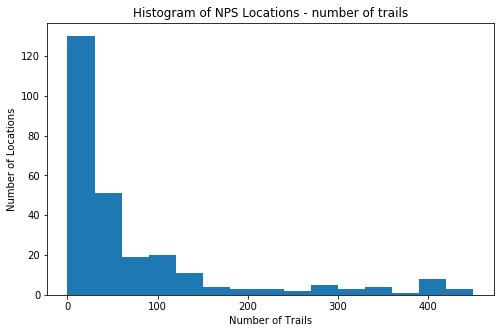

In [37]:
df_combined['Num_Trails'].plot(kind='hist', figsize=(8, 5), bins=sequence)

plt.title('Histogram of NPS Locations - number of trails')
plt.xlabel('Number of Trails')
plt.ylabel('Number of Locations')

plt.show()

**Plot of Average Trail Star Rating Distribution by NPS Location**

In [38]:
bin_size = 1
sequence = [0]
for i in range(1,11):
    if(i%bin_size==0):
        sequence.append(i/2)

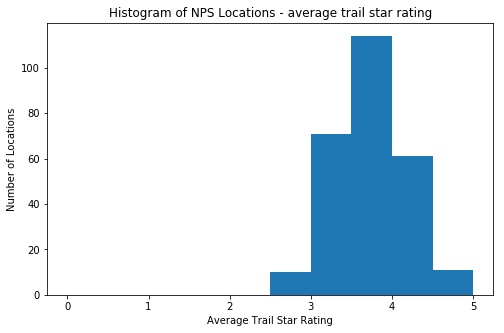

In [39]:
df_combined['Avg_Stars'].plot(kind='hist', figsize=(8, 5), bins=sequence)

plt.title('Histogram of NPS Locations - average trail star rating')
plt.xlabel('Average Trail Star Rating')
plt.ylabel('Number of Locations')

plt.show()

**Plot of Average Trail Length Distribution by NPS Location**

In [40]:
bin_size = 5
sequence = [0]
for i in range(1,df_combined['Avg_Length'].max().astype(int)+bin_size):
    if(i%bin_size==0):
        sequence.append(i)

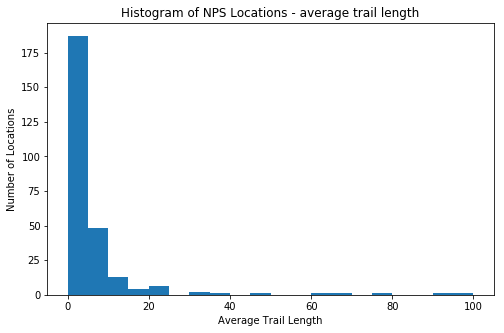

In [41]:
df_combined['Avg_Length'].plot(kind='hist', figsize=(8, 5), bins=sequence)

plt.title('Histogram of NPS Locations - average trail length')
plt.xlabel('Average Trail Length')
plt.ylabel('Number of Locations')

plt.show()

**Plot of Average Trail Difficulty Distribution by NPS Location**

In [42]:
bin_size = 1
sequence = [0]
for i in range(1,11):
    if(i%bin_size==0):
        sequence.append(i/2)

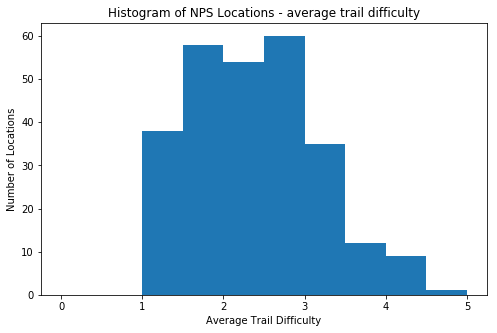

In [43]:
df_combined['Avg_Difficulty'].plot(kind='hist', figsize=(8, 5),bins=sequence)

plt.title('Histogram of NPS Locations - average trail difficulty')
plt.xlabel('Average Trail Difficulty')
plt.ylabel('Number of Locations')

plt.show()

**Plot of Average Recreational Visitor Days Distribution by NPS Location**

In [44]:
bin_size = 1000000
sequence = [0]

# Replace commas in Visitor Days column to allow to be changed to numerica data type 
df_combined.loc[:, 'Visitor Days (Recreation)'] = df_combined.loc[:, 'Visitor Days (Recreation)'].str.replace(',', '')
df_combined.loc[:, 'Visitor Days (Recreation)'] = df_combined.loc[:, 'Visitor Days (Recreation)'].astype(int)

for i in range(1,df_combined['Visitor Days (Recreation)'].max().astype(int)+bin_size):
    if(i%bin_size==0):
        sequence.append(i)

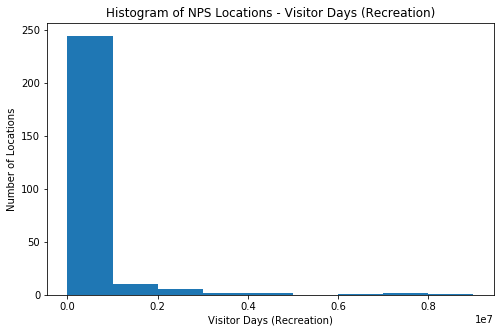

In [45]:
df_combined['Visitor Days (Recreation)'].plot(kind='hist', figsize=(8, 5), bins=sequence)

plt.title('Histogram of NPS Locations - Visitor Days (Recreation)')
plt.xlabel('Visitor Days (Recreation)')
plt.ylabel('Number of Locations')

plt.show()

### 3.f. Location Segmentation - k-means Clustering

Now we have a dataset that combines all the features we are interested in, and which has been cleaned and filtered to include only usable data, we are ready to apply a clustering algorithm. We will use the k-means clustering alogorithm on a normalised version of the data k-means requires the data to be normalised so as to not emphasise one feature above the others simply because of different magnitudes and distributions).

So let's go through the required steps to apply the k-means clustering alogrithm:

**1. Check the data types and ensure those we are using are set to *floats* so we can normalise the data:**

In [46]:
df_combined.dtypes

Park ID                                              int64
Park_Name                                           object
Num_Trails                                           int64
Avg_Stars                                          float64
Avg_Length                                         float64
Avg_Difficulty                                     float64
Visits (Recreation)                                 object
Visits (Recreation) Percentage Change               object
Visits (Non-Recreation)                             object
Visits (Non-Recreation) Percentage Change           object
Visitor Days (Recreation)                            int32
Visitor Days (Recreation) Percentage Change         object
Visitor Days (Non-Recreation)                       object
Visitor Days (Non-Recreation) Percentage Change     object
Latitude                                           float64
Longitude                                          float64
dtype: object

In [47]:
df_combined['Num_Trails']=df_combined['Num_Trails'].astype('float64') # Set to float
df_combined['Visitor Days (Recreation)']=df_combined['Visitor Days (Recreation)'].astype('float64') # Set to float

**2. Normalise the data using the StandardScaler function from the *scikitlearn* package. This creates a new dataset where each column has a mean of zero and unit variance:**

In [48]:
import sklearn
from sklearn.preprocessing import StandardScaler

df_norm = StandardScaler().fit_transform(df_combined[['Num_Trails','Avg_Stars','Avg_Length','Avg_Difficulty','Visitor Days (Recreation)']])
df_norm

array([[-0.65326835, -0.06565605, -0.14262768,  0.86381064, -0.33820034],
       [-0.18806533,  0.36633658, -0.26990018,  0.24521295, -0.27129658],
       [ 2.67910429, -0.20651076, -0.20980899, -0.8928092 , -0.34376807],
       ...,
       [-0.17857139, -0.52057961, -0.25586238, -0.37213504,  6.07419048],
       [ 0.94171342,  1.04299387,  0.16140925,  0.80805928,  4.17383708],
       [-0.15008958,  1.09664865, -0.1443519 ,  0.79195333,  1.92600966]])

**3. Set up and run the k-means clustering algorithm with 5 clusters*:**

\* *I tested several values for k and reviewed the output and found that 5 provided a useful clustering of the locations - see below.*

In [49]:
from sklearn.cluster import KMeans 

clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(df_norm)
labels = k_means.labels_
print(labels)

[3 3 2 1 3 1 3 1 1 1 3 4 1 3 2 2 1 3 3 1 1 3 3 3 0 0 3 1 1 3 2 3 1 1 3 3 1
 1 3 1 3 3 3 1 3 3 3 1 3 3 3 3 3 1 3 1 3 1 3 1 3 3 3 1 2 1 1 1 1 0 1 2 3 1
 1 3 1 3 2 1 1 3 1 1 1 1 1 1 2 2 2 1 1 3 1 1 1 1 3 3 3 4 4 3 3 3 4 2 3 1 3
 1 3 1 2 3 3 1 1 1 3 3 3 1 3 1 1 3 1 0 1 2 3 1 1 3 3 3 1 2 3 4 1 3 1 1 1 2
 3 1 1 1 1 3 3 2 3 3 1 2 1 1 3 1 0 1 3 3 2 3 1 1 3 3 1 1 1 3 3 1 3 1 1 1 3
 3 3 3 1 1 1 3 1 1 2 1 3 3 1 1 1 1 2 1 3 3 1 3 0 3 1 3 1 2 3 3 1 2 1 2 3 4
 3 3 1 3 1 1 1 1 1 1 2 0 1 1 2 1 3 3 3 3 3 1 1 2 3 3 1 1 3 2 2 3 2 1 1 1 1
 1 2 3 1 1 4 4 3]


In [50]:
df_combined['Cluster'] = labels # Include the cluster number as a new column in the dataset

**4. Create an aggregated summary of the clusters so we can better understand what kind of locations sit in each cluster:**

In [51]:
# Create average metrics for each cluster
df_clusters = df_combined.groupby(['Cluster'], as_index=False)[['Num_Trails', 'Avg_Stars', 'Avg_Length', 'Avg_Difficulty', 'Visitor Days (Recreation)']].mean()
# Create location count per cluster
df_cluster_count = df_combined.groupby(['Cluster'], as_index=False).count()

In [52]:
# Merge averages and count into single dataframe
df_clusters = pd.merge(df_clusters, df_cluster_count[['Cluster','Park ID']], on='Cluster', how='left')

In [53]:
# Rename count column
df_clusters.rename(columns={'Park ID' : 'Num_Locations'}, inplace=True)

This dataframe is now reviewed as part of the *Results* section below.

## 4. Results

Now let's review the summary of the clusters:

In [54]:
# Review output
pd.options.display.float_format = '{:.1f}'.format # Avoid scientific notation in Visitor Days columns## 1. Introduction
df_clusters

,Cluster,Num_Trails,Avg_Stars,Avg_Length,Avg_Difficulty,Visitor Days (Recreation),Num_Locations
0,0,1.7,4.0,69.3,2.2,201558.6,7
1,1,44.4,3.4,3.9,1.9,146503.1,118
2,2,339.7,3.5,3.0,2.0,170461.6,30
3,3,36.7,4.0,6.0,2.9,292439.7,104
4,4,89.0,4.0,8.0,3.1,5843829.5,8


This provides an interesting summary of the clusters that have been derived. They can be explained as follows:

+ **Cluster 4 - 'Prestige Parks':** Contains extremely popular destinations that typically have a relatively high number of impressive, challenging and lengthy hikes. There are only a few locations in this cluster but they are some of the most renowned and presitigous National Parks (including, for example, Yosemite and Yellowstone).


+ **Cluster 3 - 'Secret Gems':** This is the most interesting cluster (for many people). The hike types (in terms of rating, length and difficulty) are similar to the most prestigious National Parks in Cluster 4 - the min differences are each location has less hikes to choose from (but still dozens typically) and the locations are far less popular in terms of recreational Visitor Days.


+ **Cluster 2 - 'Densely Packed Short Walk Locations':** Contains locations which typically have a huge number of short walks nearby - this is because these tend to be in urban locations, so the hikes are generally less impressive, shorter and easier (although there are a lot of them!).


+ **Cluster 1 - 'Easy Walk Locations':** Another cluster of less popular locations - but the hikes here are less impressive, shorter and easier - thus distinguishing the cluster from Cluster 3. Some may also be in other urban locations where there are fewer defined trails.


+ **Cluster 0 - 'Long Distance Touchpoints':** There are a small number of locations that have very few nearby hikes, but those hikes are extremely long - these locations will typically be near long-distance hike trail-heads and would only be of interest if walking those specific trails.

***Note: The order of the clusters may differ if the data is re-extracted and the algorithm re-run.***

As an example let's take a look at the hiking trails in cluster 4 to confirm the summary:

**Cluster 4 NPS Locations:**

In [55]:
df_combined[df_combined['Cluster']==4]

,Park ID,Park_Name,Num_Trails,Avg_Stars,Avg_Length,Avg_Difficulty,Visits (Recreation),Visits (Recreation) Percentage Change,Visits (Non-Recreation),Visits (Non-Recreation) Percentage Change,Visitor Days (Recreation),Visitor Days (Recreation) Percentage Change,Visitor Days (Non-Recreation),Visitor Days (Non-Recreation) Percentage Change,Latitude,Longitude,Cluster
11,15,Blue Ridge Parkway,73.0,4.2,9.0,3.5,"14,690,418",-8.7%,"1,942,260",0.0%,7624633.0,-8.7%,"80,928",0.0%,36.1,-81.7,4
101,121,Glen Canyon National Recreation Area,19.0,4.0,9.3,3.1,"4,219,441","-7.8% 32,447",NaN,-6.3%,3756079.0,-6.6%,"32,446",-6.3%,37.7,-111.1,4
102,123,Grand Canyon National Park,26.0,4.4,11.7,3.5,"6,380,495","2.0% 23,748",NaN,-9.2%,8375564.0,1.9%,"1,979",-9.2%,36.3,-112.3,4
106,128,Great Smoky Mountains National Park,206.0,3.6,7.5,3.2,"11,421,200","0.7% 10,544,377",NaN,1.4%,6971445.0,0.4%,"439,349",1.4%,35.6,-83.4,4
141,170,Lake Mead National Recreation Area,35.0,4.0,4.5,3.1,"7,578,958",-3.8%,"274,885",-3.8%,4812445.0,-4.1%,"137,442",-3.8%,35.9,-114.7,4
221,263,Sequoia National Park,123.0,4.4,10.0,3.5,"1,229,594",-4.8%,"17,480",29.0%,3202421.0,-8.3%,"5,827",29.0%,36.5,-118.6,4
264,314,Yellowstone National Park,56.0,3.5,3.4,2.0,"4,115,000","0.0% 1,229,439",NaN,-1.5%,7047257.0,0.5%,"62,654",-1.2%,44.6,-110.6,4
265,315,Yosemite National Park,174.0,4.2,8.4,3.0,"4,009,436","-7.6% 151,651",NaN,-7.3%,4960792.0,-16.5%,"319,769",-10.4%,37.8,-119.5,4


## 5. Discussion

It's worth plotting the clustered locations on a map of the US to see how this looks:

In [56]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

US_lat = 37.0902
US_long = -95.7129

# create map
map_clusters = folium.Map(location=[US_lat, US_long], zoom_start=4)

# set color scheme for the clusters
x = np.arange(clusterNum)
ys = [i + x + (i*x)**2 for i in range(clusterNum)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_combined['Latitude'], df_combined['Longitude'], df_combined['Park_Name'], df_combined['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Let's assume that many of the target audience will be interested in **Cluster 3**, since these locations promise high quality, challenging and lengthy hikes in less busy parks.

### What does the map above tell us?

Well the good news is that while there are more Cluster 3 locations in the Western United States, there are at least some across the whole country.

In addition we can see there are several Cluster 3 locations nearby the Cluster 4 'Prestige' parks. This means you could plan your trip to see the most popular sites, while also finding nearby areas of tranquility with great hikes.

Finally the map tells us where there might be further improvements to make in the methodology we have used. For example, Cluster 2 (Densely Packed Short Walk Locations) is described as typically including urban locations - but there are a some exceptions like Timpanogos Cave NP and Rocky Mountain NP, and while urban sites in San Francisco, Los Angeles, Boston and Washington seem to be well defined in this category, it is not the case for sites in New York.

Let's take a quick look at the San Francisco area to see how our clustering looks there:

In [57]:
SF_lat = 37.7749
SF_long = -122.4194

# create map
map_clusters_SF = folium.Map(location=[SF_lat, SF_long], zoom_start=6)

# set color scheme for the clusters
x = np.arange(clusterNum)
ys = [i + x + (i*x)**2 for i in range(clusterNum)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_combined['Latitude'], df_combined['Longitude'], df_combined['Park_Name'], df_combined['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_SF)
       
map_clusters_SF

Perfect! So if you were planning a trip to Yosemite NP you might now consider a visit to Devils Postpile National Monument (instead or as well) to do some great hiking without the crowds.

Finally, let's say we were most concerned about the quality of the hikes. Let's take a look at the data for Cluster 3 locations with more than 30 trails, sorted by average star rating. From this we might find some interesting ideas for a hiking trip that we had not previously considered - for example *Voyageurs National Park*  in Minnesota might be well worth a look!

In [60]:
df_combined[(df_combined['Cluster']==3) & (df_combined['Num_Trails']>30)].sort_values(by='Avg_Stars',ascending=False)

,Park ID,Park_Name,Num_Trails,Avg_Stars,Avg_Length,Avg_Difficulty,Visits (Recreation),Visits (Recreation) Percentage Change,Visits (Non-Recreation),Visits (Non-Recreation) Percentage Change,Visitor Days (Recreation),Visitor Days (Recreation) Percentage Change,Visitor Days (Non-Recreation),Visitor Days (Non-Recreation) Percentage Change,Latitude,Longitude,Cluster
247,294,Voyageurs National Park,35.0,5.0,10.0,2.5,"239,656",1.0%,0,0.0%,99371.0,-4.1%,0,0.0%,48.4,-92.9,3
38,44,Channel Islands National Park,57.0,4.6,3.6,2.2,"366,250",-4.5%,"5,863",-48.8%,310422.0,-5.3%,"11,726",-48.8%,34.0,-120.1,3
93,110,Gateway Arch National Park,43.0,4.5,1.9,1.3,"2,016,180",44.2% 0,NaN,0.0%,672061.0,44.2%,0,0.0%,38.6,-90.2,3
136,163,Kings Canyon National Park,54.0,4.5,16.6,3.8,"699,023","0.9% 28,923",NaN,2.1%,1906700.0,-0.9%,"9,641",2.1%,36.9,-118.6,3
140,168,Lake Chelan National Recreation Area,78.0,4.3,16.3,3.8,"38,839",1.0%,0,0.0%,40585.0,-3.3%,0,0.0%,48.3,-120.7,3
22,27,Canyonlands National Park,73.0,4.3,6.9,2.9,"739,449",-0.4%,0,0.0%,441816.0,-1.4%,0,0.0%,38.2,-110.0,3
242,288,Ulysses S. Grant National Historic Site,102.0,4.3,1.8,1.7,"43,602",-27.0%,0,0.0%,5450.0,-27.0%,0,0.0%,38.6,-90.4,3
187,227,Petersburg National Battlefield,55.0,4.2,2.2,2.5,"204,322",-2.0%,"364,012",-0.7%,17525.0,-4.9%,"7,584",-0.7%,37.2,-77.4,3
105,127,Great Basin National Park,38.0,4.2,3.1,3.9,"153,094",-8.9% 816,NaN,9.1%,136372.0,13.6%,34,8.8%,38.9,-114.2,3
266,317,Zion National Park,59.0,4.2,4.7,2.9,"4,320,033","-4.1% 21,900",NaN,0.0%,2492823.0,-1.2%,456,0.0%,37.3,-113.0,3


In [59]:
df[df['Park ID']==294]

,Park ID,Park Name (Ext),Park lat,Park long,name,type,difficulty,stars,starVotes,location,length,ascent,descent,high,low,latitude,longitude
17830,294,Voyageurs National Park,48.4,-92.9,National Parks Marathon Project - Voyageurs Na...,Featured Hike,3.0,5.0,1,"Kabetogama, Minnesota",25.4,1345,-1336,1316,1126,48.5,-92.8
17831,294,Voyageurs National Park,48.4,-92.9,Locator Lake Trail,Trail,2.0,5.0,2,"Kabetogama, Minnesota",2.0,148,-121,1221,1123,48.5,-93.0
17832,294,Voyageurs National Park,48.4,-92.9,Blind Ash Bay Trail,Trail,3.0,5.0,1,"Kabetogama, Minnesota",1.9,292,-250,1228,1124,48.4,-92.9
17833,294,Voyageurs National Park,48.4,-92.9,Cruiser Lake Trail,Trail,2.0,5.0,1,"Kabetogama, Minnesota",10.9,944,-939,1336,1111,48.5,-92.8
17834,294,Voyageurs National Park,48.4,-92.9,Kab-Ash Trail,Trail,1.0,0.0,0,"Kabetogama, Minnesota",19.4,1518,-1591,1334,1113,48.4,-93.0
17835,294,Voyageurs National Park,48.4,-92.9,Echo Bay Trail,Trail,1.0,0.0,0,"Kabetogama, Minnesota",2.3,144,-149,1195,1132,48.5,-93.1
17836,294,Voyageurs National Park,48.4,-92.9,Sullivan Bay Trail,Trail,1.0,0.0,0,"Kabetogama, Minnesota",0.7,56,-26,1173,1124,48.4,-92.8
17837,294,Voyageurs National Park,48.4,-92.9,Anderson Bay Loop,Trail,1.0,0.0,0,"Kabetogama, Minnesota",1.8,192,-181,1221,1127,48.5,-92.8
17838,294,Voyageurs National Park,48.4,-92.9,Little Shoepack Trail,Trail,1.0,0.0,0,"Kabetogama, Minnesota",1.1,37,-40,1227,1201,48.5,-92.9
17839,294,Voyageurs National Park,48.4,-92.9,Cruiser Lake Trail: South Alternate,Trail,1.0,0.0,0,"Kabetogama, Minnesota",2.4,113,-166,1234,1167,48.5,-92.8


## 6. Conclusion

### 6.a. Report Conclusion

So, having collated a range of data relating to NPS locations and Hiking Trails in the United States, we have been able to segment the locations into a useful set of clusters that have helped me to identify some potential destinations outside the most famous national parks.

One of our clusters in particular has helped us identify those locations that share similar trail (length, difficulty, rating) to the more prestigious locations, but which are likely to be less busy since they have fewer visitor days per year.

By plotting the clusters using *Folium* we have been able to conclude that there are several desirable locations across the country and we can use the clustering, along with the aggregated dataset that we have created to identify suitable destinations depending on specific criteria and location.

### 6.b. Lessons Learned

From a learning perspective it has been clear from this exercise that a lot of the time and effort spent on a data science project is in the sourcing, collating and cleaning of the data prior to use. The application of machine learning algorithms can be relatively quick because of the pre-defined libraries and packages available (although there is still a lot to do in terms of testing and evaluating the models before a final solution can be selected).

Of course the results from any project such as this can always be improved - here are a few examples of how this project might be enhanced with more data or alternate methodology:

+ Consider more locations than just NPS locations provided in the data.
+ Use an alternative (paid for) geocoding service to include some locations that were excluded from the dataset because of missing latitude/longitude data.
+ Define locations by complete area using boundary points rather than a single central latitude/longitude.
+ Repeat the project for countries other than the USA.
+ Incorporate other datasets - e.g. distance to nearest large city - to refine definition of Cluster 2.
+ Repeat the analysis with different parameters for the distance metric in the Hiking Project API - e.g. does a value different from 15km yield very different results?
+ Consider creating a new metric for popularity - some locations will be larger and so would be able to accept a higher number of visitors / visitor days before *feeling* busy. Perhaps *Visitor Days per Trail* or similar would be of interest.
+ Engage with the Hiking Project to determine how 'complete' their dataset is: Are there regions where there are many more trails than included in their database? Are there alternate data sources on hiking trails that could be sourced/acquired/merged?